<a href="https://colab.research.google.com/github/cristinapopescu19/Projects/blob/An-num/FEM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[ 0.    0.01  0.02 ...  9.98  9.99 10.  ]


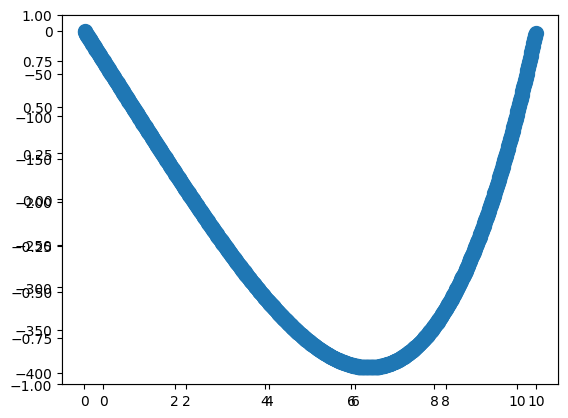

In [6]:

import numpy as np
import matplotlib.pyplot as plt

L = 10 # length of interval
Nel = 1000 # nr of elements
Nnod = Nel+1 # nr of nodes

x = np.zeros (Nnod)
x[0]= 0
h = L/Nel
for i in range (1, Nnod):
    x[i] = x[i-1] + h
print(x)

plt.figure(1)
ax = plt.axes()
ax.plot (x,np.zeros_like(x), linestyle = 'None', marker = 'o', markersize = 10)
ax.set_xlim (0-L/10, L+L/10)
ax.set_ylim (-1,1)

Q = np.array([range(0,Nnod-1), range(1, Nnod)]) # matrix of connection between nodes and elements
#print (Q)
#print (Q[0,:])
#print (Q[:,1])
#print (type(Q))
#print (Q.shape)
#print (Q[:,1].shape)
nod_known = np.array ([0,Nnod-1])
nod_unknown = np.array(range(1,Nnod-1))

acoef=1
bcoef=0
ccoef=0
func=lambda x: x**2

u_known = np.array([0,0])
f = np.zeros((Nnod,1))
K = np.zeros((Nnod, Nnod))
Nnode = 2 # Nr of nodes per element
xe = np.zeros(2)
csi = [-1/np.sqrt(3), 1/np.sqrt(3)]
w = [1,1] #weights
n = 2


for e in range(Nel):
    node = np.zeros(Nnode, dtype = int)
    node[0] = Q[0,e]
    node[1] = Q[1,e]
    xe[0] = x[node[0]]
    xe[1] = x[node[1]]
    fe = np.zeros((Nnode,1))
    Ke = np.zeros((Nnode,Nnode))
    for i in range(n):
        csi_i = csi[i]
        x_csi = 0.5 * (1 - csi_i) * xe[0] + 0.5 * (1 + csi_i) * xe[1]
        f_csi = func(x_csi)
        Ne_csi = 0.5 * np.array([[1 - csi_i], [1 + csi_i]])
        Be_csi = np.array([[-0.5, 0.5]])
        F_csi = -f_csi * Ne_csi * np.dot (Be_csi, xe)
        fe = fe + F_csi * w[i]
        G_csi = acoef * 1/np.dot (Be_csi, xe) * np.dot(Be_csi.T, Be_csi)
        Ke = Ke + G_csi
    for i in range(Nnode):
        k = node[i]
        f[k] = f[k] + fe[i]
        for j in range(Nnode):
            l = node[j]
            K[k,l] = K[k,l] + Ke[i,j]

np.linalg.det(K)

K22=K[1:Nnod-1,1:Nnod-1]
K12 = K[[0,Nnod-1],1:Nnod-1]
f2 = f[1:Nnod-1,0]
#print(K22)
#print(K12)
#print(f2)
u_unknown = np.linalg.solve(K22,f2-K12.T @ u_known)
plt.figure(1)
ax = plt.axes()
ax.plot (x[1:Nnod-1],u_unknown, linestyle = 'None', marker = 'o', markersize = 10)


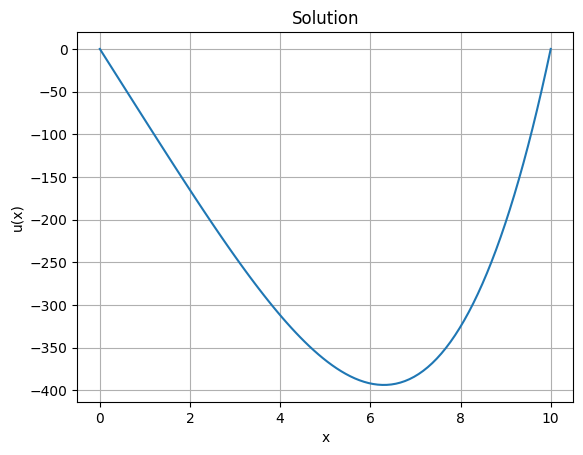

In [7]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def fun(x, y):
    return np.array((y[1], x**2))

def fuun(ya, yb):
    return np.array([ya[0], yb[0]])

x = np.linspace(0, L, 100)
y = np.zeros((2, x.size))
res = solve_bvp(fun, fuun, x, y)

plt.plot(res.x, res.y[0])
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Solution')
plt.grid(True)
plt.show()